In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
class coin:
    def __init__(self, name, choice):
        self._name = name
        self.nheads = 0
        self.prob = -1
        if(self._name == 'A'):
            if(choice == 1):
                self.prob = 0.2
            elif(choice == 2):
                self.prob = 0.45
            else:
                print("Enter correct input for choice of probability")
        elif(self._name == 'B'):
            if(choice == 1):
                self.prob = 0.4
            elif(choice == 2):
                self.prob = 0.5
            else:
                print("Enter correct input for choice of probability")
        elif(self._name == 'C'):
            if(choice == 1):
                self.prob = 0.7
            elif(choice == 2):
                self.prob = 0.58
            else:
                print("Enter correct input for choice of probability")
        else:
            print("Enter correct input for coin name")

Prob("Correct coin chosen") = Prob(nC > nB > nA) + Prob(nC > nA > nB) + Prob(nC = nB > nA)/2 + Prob(nC = nA > nB)/2 + Prob(nC = nB = nA)/3

Prob("Wrong coin chosen") = 1 - Prob(correct coin chosen)

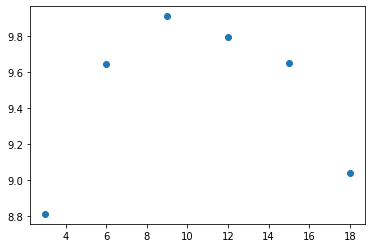

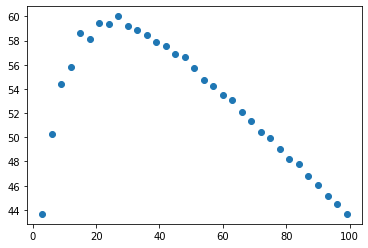

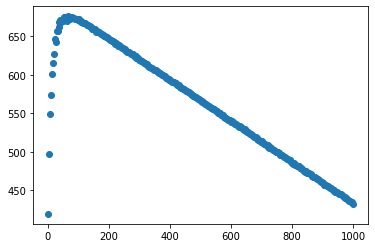

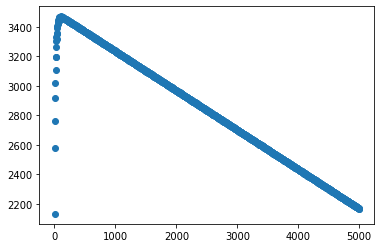

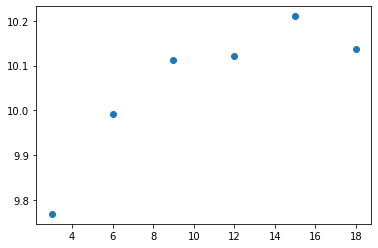

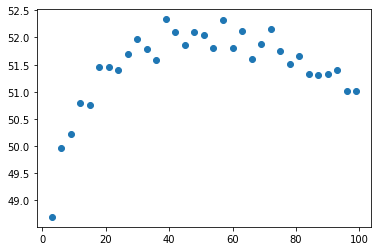

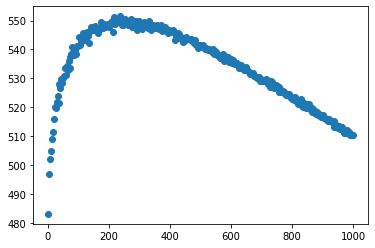

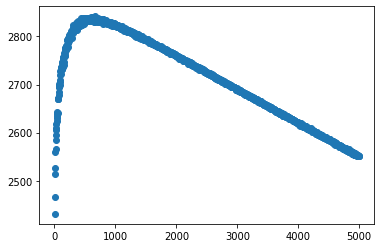

In [ ]:
for p_choice in [1, 2]:
  for N in [20, 100, 1000, 5000]:
    A = coin('A', p_choice)
    B = coin('B', p_choice)
    C = coin('C', p_choice)
    N1_list = range(3, N, 3)
    R_N1 = []
    for N1 in N1_list:
      R_list = []
      for i in range(0, 1000):
        A.nheads = 0; B.nheads = 0; C.nheads = 0;
        for j in range(0, N1//3):
          if(random.random() < A.prob):
            A.nheads+=1
          if(random.random() < B.prob):
            B.nheads+=1
          if(random.random() < C.prob):
            C.nheads+=1
        R = A.nheads + B.nheads + C.nheads
        A.expprob = A.nheads*3/N1; B.expprob = B.nheads*3/N1; C.expprob = C.nheads*3/N1;
        for k in range(0, N - N1):
          if (A.expprob == max(A.expprob, B.expprob, C.expprob)):
            S = A
          elif (B.expprob == max(A.expprob, B.expprob, C.expprob)):
            S = B
          else:
            S = C
          if(random.random() < S.prob):
            R += 1
        R_list.append(R)
      avg_R = np.sum(R_list)/len(R_list)
      R_N1.append(avg_R)
    plt.scatter(N1_list, R_N1)
    plt.show()

In the above graphs, the x-axis represents values of N1 and y-axis represents the average number of heads in a thousand experiments for a given value of N1 < N.

Theoretical Probability:

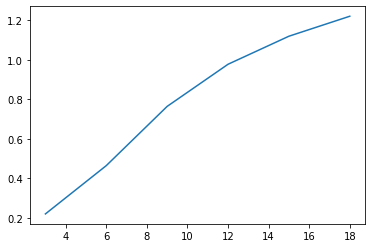

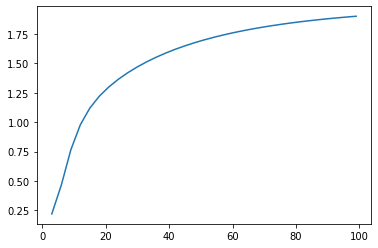

In [ ]:
import math
for p_choice in [1, 2]:
  for N in [20, 100, 1000, 5000]:
    A = coin('A', p_choice)
    B = coin('B', p_choice)
    C = coin('C', p_choice)
    N1_list = range(3, N, 3)
    th_probs = []
    for N1 in N1_list:
      term1 = 0
      for k in range(2, (N1//3)+1):
        subterm1 = 0
        for l in range(1, k):
          subsubterm1 = 0
          for p in range(0,l):
            subsubterm1 += math.comb(N1//3,p)*math.pow(A.prob, p)*math.pow(1-A.prob, N1//3-p)
          subterm1 += math.comb(N1//3, l)*math.pow(B.prob, l)*math.pow(1-B.prob, N1//3 - l)*subsubterm1
        term1 += math.comb(N1//3, k)*math.pow(C.prob, k)*math.pow(1-C.prob, N1//3 - k)*subterm1

      term2 = 0
      for k in range(2, (N1//3)+1):
        subterm2 = 0
        for l in range(1, k):
          subsubterm2 = 0
          for p in range(0,l):
            subsubterm2 += math.comb(N1//3,p)*math.pow(B.prob, p)*math.pow(1-B.prob, N1//3-p)
          subterm2 += math.comb(N1//3, l)*math.pow(A.prob, l)*math.pow(1-A.prob, N1//3 - l)*subsubterm1
        term2 += math.comb(N1//3, k)*math.pow(C.prob, k)*math.pow(1-C.prob, N1//3 - k)*subterm1

      term3 = 0
      for k in range(1, (N1//3)+1):
        subterm3 = 0
        for l in range(0,k):
          subterm3 += math.comb(N1//3, l)*math.pow(A.prob, l)*math.pow(1-A.prob, N1//3 - l)
        term3 += math.pow(math.comb(N1//3, k), 2)*math.pow(C.prob*B.prob, k)*math.pow((1-C.prob)*(1-B.prob), N1//3 - k)*subterm3

      term4 = 0
      for k in range(1, (N1//3)+1):
        subterm4 = 0
        for l in range(0,k):
          subterm4 += math.comb(N1//3, l)*math.pow(B.prob, l)*math.pow(1-B.prob, N1//3 - l)
        term4 += math.pow(math.comb(N1//3, k), 2)*math.pow(C.prob*A.prob, k)*math.pow((1-C.prob)*(1-A.prob), N1//3 - k)*subterm4

      term5 = 0
      for k in range(0,N1//3+1):
        term5 += math.pow(math.comb(N1//3, k), 3)*math.pow(C.prob*B.prob*A.prob, k)*math.pow((1-C.prob)*(1-B.prob)*(1-A.prob), N1//3-k)
      theoretical_probability = 1 - (term1+term2+term3/2+term4/2+term5/3)
      th_probs.append(theoretical_probability)
    plt.plot(N1_list, th_probs)
    plt.show()